In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.stats import lognorm

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [4]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230209_quinine (2)'
subfolder = glob.glob(cwd + '/quinine_1E-4M_100ms_Abs**')
subfolder.sort()
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230209_quinine (2)/quinine_1E-4M_100ms_Abs_20230216-174828_aa5739c9.csv


In [5]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['quinine_1E-4M_100ms_FEP']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = title
         # 'ZnI2 128 uL/min']

quinine_1E-4M_100ms_Abs_20230216-174828_aa5739c9.csv


In [6]:
## Reading dark and reference
dark = glob.glob(cwd + '/Dark_100ms**.csv')
ref = glob.glob(cwd + '/H2SO4_100ms**.csv')

dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

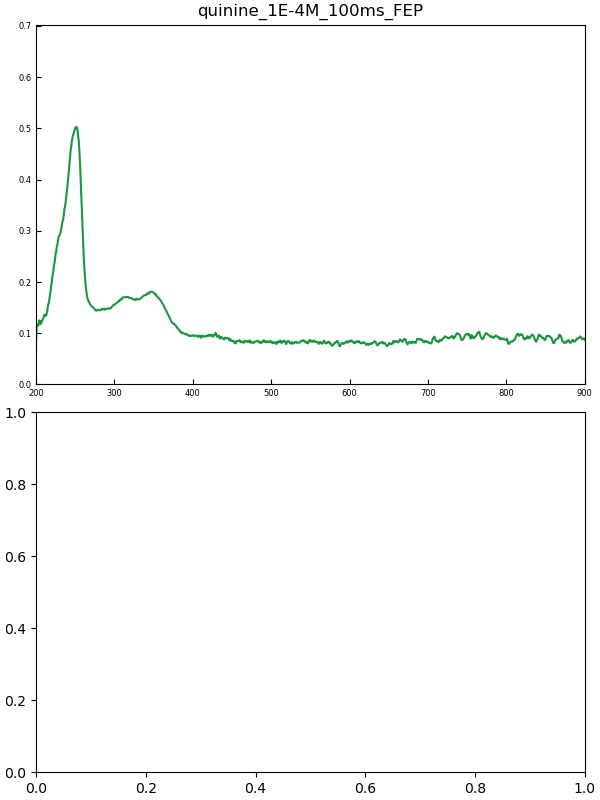

In [11]:
## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(2, 1, figsize = (6, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 0
w2 = 800

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i])
    data_files.sort()
    # del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    skiprows=5
    
    for j in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        absorbance = -np.log10((df_j.Sample-dark_df.Sample)/(ref_df.Sample-dark_df.Sample))
        ax1[i].plot(df_j.Energy, absorbance, color=cmap(color_idx[j-k1]))
        ax1[i].set_xlim(200, 900)
        ax1[i].set_ylim(0, max(absorbance[w1:w2])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
#         #df_i[f'Iten_{j}'] = df_j.intensity
#         df_i = pd.concat([df_i, absorbance], axis=1, ignore_index=True)
    
#     df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
#     #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
#     df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
#     x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
#     df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['Energy'] = df_j.Energy
df['Absorbance'] = absorbance
# df_norm['Energy'] = df_j.Energy.loc[w1:w2]
# #df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
# df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

In [12]:
df[210:215]

,Energy,Absorbance
210,364.721267,0.147173
211,365.509089,0.145844
212,366.296840,0.143530
213,367.084519,0.140580
214,367.872128,0.138380


In [9]:
df

""


In [ ]:
## Plot average PL profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (8, 6))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df.Energy, getattr(df, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=os.path.basename(title[i]))

legend_properties = {'weight':'bold', 'size':16}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

In [ ]:
## Fit PL peaks by 1 Gaussian distribution
## http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html
## https://en.wikipedia.org/wiki/Cauchy_distribution


def _1gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))


def _1Lorentz(x, A, x0, sigma):
    return A*sigma**2/((x-x0)**2+sigma**2)


def _1peak_fit_PL(x, y, distr='G', plot=False, plot_title=None, maxfev=100000):    
    # 'G': Guassian
    # 'L': Lorentz        
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    if distr == 'G':
        popt, pcov = curve_fit(_1gauss, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    else:
        popt, pcov = curve_fit(_1Lorentz, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    
    A = popt[0]
    x0 = popt[1]
    sigma = popt[2]
    
    if distr == 'G':
        fitted_result = _1gauss(x, *popt)
        fit_model = 'Gaussian'
    else:
        fitted_result = _1Lorentz(x, *popt)
        fit_model = 'Lorentz'
    
    #fitted_result = _1gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        plt.legend()
        plt.title(f'{fit_model} : {plot_title}')
        plt.show()
    else: pass
    
    return A, x0, sigma


In [ ]:
w1 = 150
w2 = 300
i = 0
x = df[w1:w2].Energy
y = getattr(df[w1:w2], os.path.basename(subfolder[i]))
_1peak_fit_PL(x, y, plot=True, distr='G', plot_title='THORLABS_M365LP1')

In [ ]:
w1 = 300
w2 = 800
i = 0
x = df[w1:w2].Energy
y = getattr(df[w1:w2], os.path.basename(subfolder[i]))
_1peak_fit_PL(x, y, plot=True, distr='L', plot_title=os.path.basename(title[i]))

In [ ]:
_1peak_fit_PL(x, y, plot=True, distr='G', plot_title=os.path.basename(title[i]))

In [ ]:
## Fit PL peaks by Multi Gaussian distributions
## http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html

def _2gauss(x, A1, x1, s1, A2, x2, s2):
    return (_1gauss(x, A1, x1, s1) +
            _1gauss(x, A2, x2, s2))


def _3gauss(x, A1, x1, s1, A2, x2, s2, A3, x3, s3):
    return (_1gauss(x, A1, x1, s1) +
            _1gauss(x, A2, x2, s2) + 
            _1gauss(x, A3, x3, s3))


def _2Lorentz(x, A1, x1, s1, A2, x2, s2):
    return (_1Lorentz(x, A1, x1, s1) +
            _1Lorentz(x, A2, x2, s2))


def _3Lorentz(x, A1, x1, s1, A2, x2, s2, A3, x3, s3):
    return (_1Lorentz(x, A1, x1, s1) +
            _1Lorentz(x, A2, x2, s2) +
            _1Lorentz(x, A3, x3, s3))


def _2peak_fit_PL(x, y, distr='G', height=930, plot=False, plot_title=None, second_peak=3, maxfev=100000):
    # 'G': Guassian
    # 'L': Lorentz  
    peaks, _ = find_peaks(y, height=height)
    if len(peaks) >2:
        raise IndexError('Number of peaks should be less than 2.')
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    
    if len(peaks) == 2:
        if distr == 'G':
            popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
        else:
            popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
    else:
        if distr == 'G':
            popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
        else:
            popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak*sigma), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
    #A = popt[0]
    #x0 = popt[1]
    #sigma = popt[2]
    
    pars_1 = popt[0:3]
    pars_2 = popt[3:6]
    
    if distr == 'G':
        peak_1 = _1gauss(x, *pars_1)
        peak_2 = _1gauss(x, *pars_2)
        fit_model = 'Gaussian'
    else:
        peak_1 = _1Lorentz(x, *pars_1)
        peak_2 = _1Lorentz(x, *pars_2)
        fit_model = 'Lorentz'
    
    fitted_result = _2gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        
        # peak 1
        plt.plot(x, peak_1, "g", label='peak 1')
        plt.fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)
  
        # peak 2
        plt.plot(x, peak_2, "y", label='peak 2')
        plt.fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)  
        
        plt.title(f'{fit_model} : {plot_title}')
        plt.legend()
        plt.show()
    else: pass
    
    return popt



def _2peak_fit_PL2(x, y, distr='G', height=930, plot=False, plot_title=None, second_peak=None, maxfev=100000):
    # 'G': Guassian
    # 'L': Lorentz  
    peak, _ = find_peaks(y, height=height)
    peaks=[peak[0]]
    for i in range(1, len(peak)):
        if peak[i]-peak[i-1]>20:
            peaks.append(peak[i])
    
    if len(peaks) >2:
        raise IndexError('Number of peaks should be less than 2.')
        
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx, array[idx]
    
    if len(peaks) == 2:
        if distr == 'G':
            popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
        else:
            popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
    else:
        if abs(second_peak)<20:
            if distr == 'G' and abs(second_peak)<20:
                popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
            else:
                popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak*sigma), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
            
        else:
            if distr == 'G' and abs(second_peak)>=20:
                popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[find_nearest(x, second_peak)[0]], second_peak, sigma], maxfev=maxfev)
            else:
                popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak*sigma), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
    #A = popt[0]
    #x0 = popt[1]
    #sigma = popt[2]
    
    pars_1 = popt[0:3]
    pars_2 = popt[3:6]
    
    if distr == 'G':
        peak_1 = _1gauss(x, *pars_1)
        peak_2 = _1gauss(x, *pars_2)
        fit_model = 'Gaussian'
    else:
        peak_1 = _1Lorentz(x, *pars_1)
        peak_2 = _1Lorentz(x, *pars_2)
        fit_model = 'Lorentz'
    
    fitted_result = _2gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        
        # peak 1
        plt.plot(x, peak_1, "g", label='peak 1')
        plt.fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)
  
        # peak 2
        plt.plot(x, peak_2, "y", label='peak 2')
        plt.fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)  
        
        plt.title(f'{fit_model} : {plot_title}')
        plt.legend()
        plt.show()
    else: pass
    
    return popt

In [ ]:
w1 = 370
w2 = 670
i = 0
x = np.array(df[w1:w2].Energy)
y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
#_2peak_fit_PL(x,y, distr='L', height=1000, second_peak=-.4, plot=True, plot_title=os.path.basename(subfolder[i]))
popt = _2peak_fit_PL2(x,y, distr='G', height=1200, second_peak=-4, plot=True, plot_title=os.path.basename(title[i]))
# peaks, _ = find_peaks(y, height=1700)
simpson_int = integrate.simpson(y,x)
fit_int = integrate.quad(_1gauss, 490, 715, args=tuple(popt[0:3]))[0] + integrate.quad(_1gauss, 490, 715, args=tuple(popt[3:6]))[0]
fit_int2 = integrate.quad(_2gauss, 490, 715, args=(*popt,))[0]

In [ ]:
# peak = [87,89,90,92,523]
# peaks=[peak[0]]
# for i in range(1, len(peak)):
#     if peak[i]-peak[i-1]>20:
#         peaks.append(peak[i])

In [ ]:
peaks

In [ ]:
fit_int2

In [ ]:
fit_int

In [ ]:
w1 = 400
w2 = 900
i = 0
x = np.array(df[w1:w2].wavelength)
y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
x1 = np.log(x-min(x))[1:]
y1 = y[1:]
plt.figure()
#plt.plot(x,y)
plt.plot(x1,y1)
_1peak_fit_PL(x1, y1, plot=True, distr='G', plot_title=os.path.basename(subfolder[i]))

In [ ]:
def _1lognorm(x, A, x0, s):
    return A / (s*(x-x0)*np.sqrt(2*np.pi)) * np.exp(-1/2*(np.log(x-x0)/s)**2)
    #return A * np.exp(-1/2*(np.log(x-x0)/s)**2)


def _1peak_fit_PL_2(x, y, distr='LG', plot=False, plot_title=None, maxfev=100000):    
    # 'G': Guassian
    # 'L': Lorentz 
    # 'LG': Lognormal
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    if distr == 'G':
        popt, pcov = curve_fit(_1gauss, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    elif distr == 'L':
        popt, pcov = curve_fit(_1Lorentz, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    else:
        popt, pcov = curve_fit(_1lognorm, x, y, p0=[8, 0, 100], maxfev=maxfev)
    
    A = popt[0]
    x0 = popt[1]
    sigma = popt[2]
    
    if distr == 'G':
        fitted_result = _1gauss(x, *popt)
        fit_model = 'Gaussian'
    elif distr == 'L':
        fitted_result = _1Lorentz(x, *popt)
        fit_model = 'Lorentz'
    else:
        fitted_result = _1lognorm(x, *popt)
        fit_model = 'Lognormal'
    
    #fitted_result = _1gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        plt.legend()
        plt.title(f'{fit_model} : {plot_title}')
        plt.show()
    else: pass
    
    return A, x0, sigma


In [ ]:
## Plot Normalized (by Max-min) PL profiles in each subfolder
f4, ax4 = plt.subplots(1, 1, figsize = (12, 9))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
label = ['CsPbBr', 'CsPbBr_I_08uL', 'CsPbBr_I_16uL', 'CsPbBr_I_32uL', 'CsPbBr_I_64uL']
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax4.plot(df_norm2.wavelength, getattr(df_norm2, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':18}    
ax4.legend(prop=legend_properties)

ax4.set_xlim(400, 810)
ax4.set_xlabel('Wavelength (nm)', fontsize=labelsize, fontweight=fontweight)
ax4.set_ylabel('PL Intensity Norm.', fontsize=labelsize, fontweight=fontweight)

imag_name = '20220630_PL_CsPbBr_I.png'
#plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=False)